In [59]:
#Import the tools

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [5]:
#Load the data
#data has been downloaded from Kaggle and saved in the data folder
loan_data = pd.read_csv('../data/loan_data.csv')

In [6]:
# Get the summary of the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [12]:
#The above shows that there is no missing values

#Just to confirm again:

missing = loan_data.isnull().sum()
print(missing)



credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [13]:
#Quick Preview the data
loan_data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [15]:
#Understand Credit.policy
print(loan_data['credit.policy'].describe())

count    9578.000000
mean        0.804970
std         0.396245
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit.policy, dtype: float64


Text(0, 0.5, 'Count')

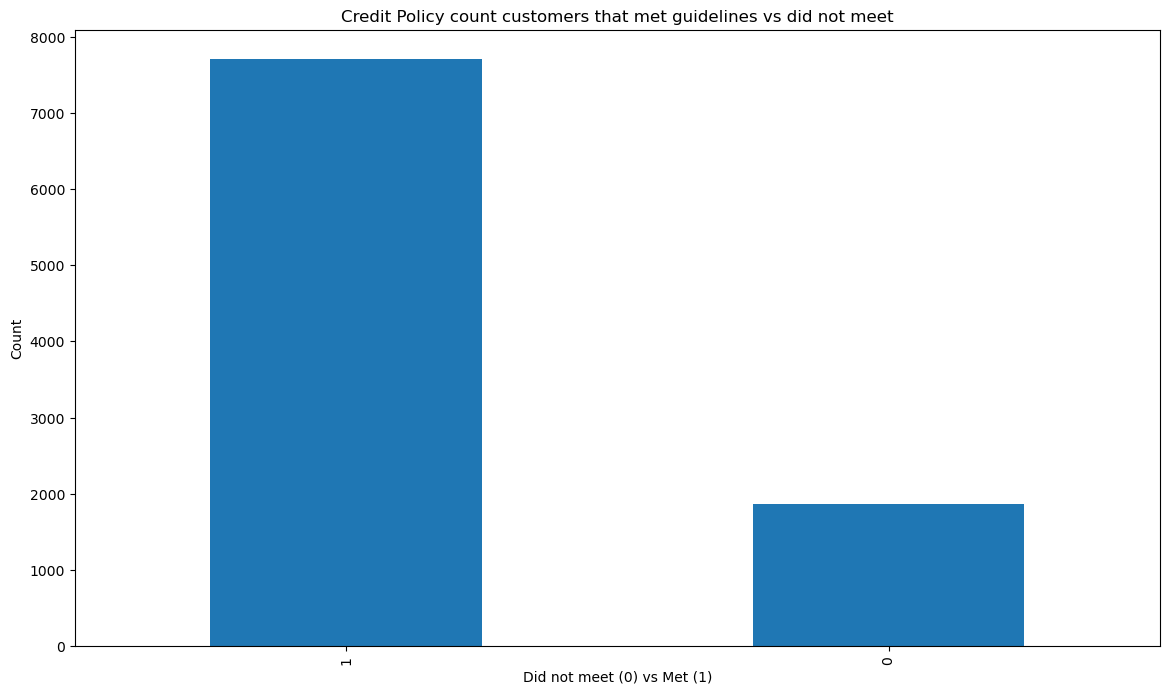

In [16]:
    #Credit policy is either 1 or 0, this is if the customer meets the credit underwriting guidelines 
    
    # We will plot to understand the balance between the number of customers that have met the credit policy to understand
ax = loan_data['credit.policy'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Credit Policy count customers that met guidelines vs did not meet")
ax.set_xlabel("Did not meet (0) vs Met (1)")
ax.set_ylabel("Count")

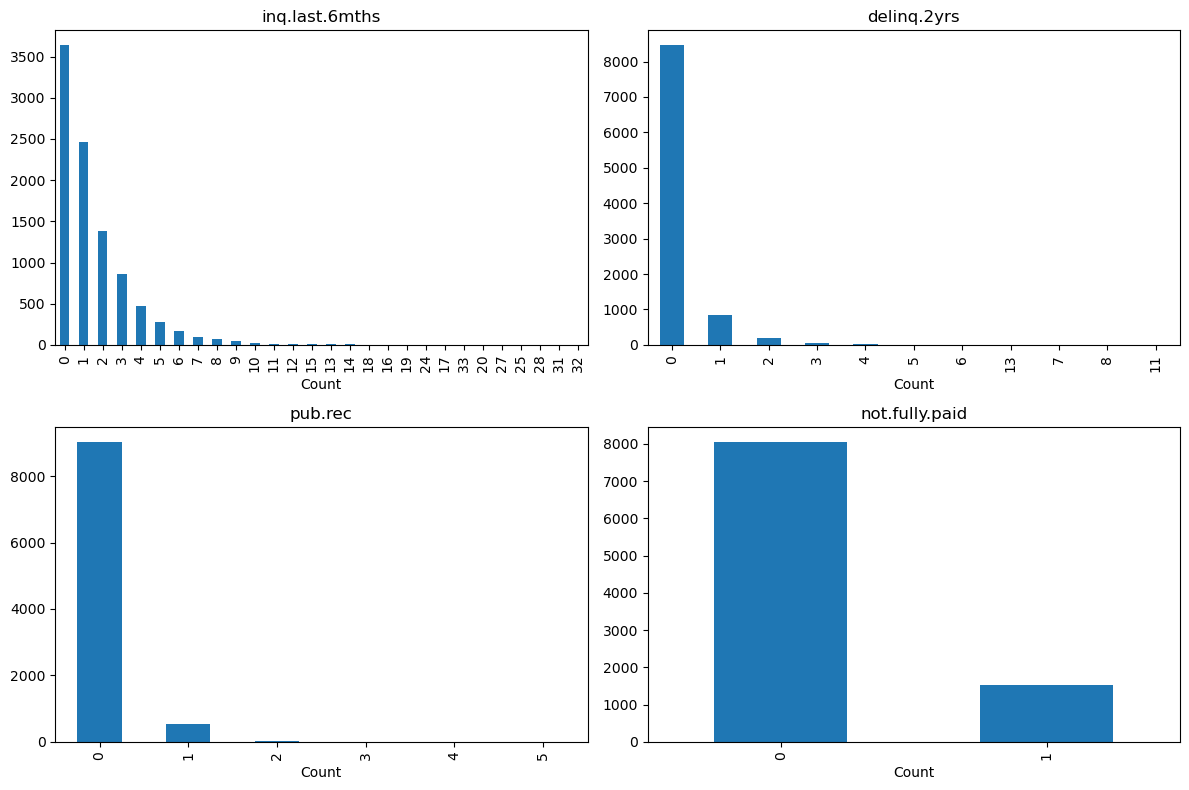

In [26]:
# Now that we understand credit policy, we are also going to look into: inq.last.6months, delinq.2yrs, pub.rec, and not fully paid


#create 4 plots on 2 rows and 2 columns figuresize of (12,8)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

loan_data['inq.last.6mths'].value_counts().plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('inq.last.6mths')
ax[0, 0].set_xlabel('Count')

loan_data['delinq.2yrs'].value_counts().plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('delinq.2yrs')
ax[0, 1].set_xlabel('Count')

loan_data['pub.rec'].value_counts().plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('pub.rec')
ax[1, 0].set_xlabel('Count')

loan_data['not.fully.paid'].value_counts().plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title("not.fully.paid")
ax[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.show()

#inq.Last.6mths is number of credit inquiries a customer had in the lat 6 months, will investigate if there are outliers
#delinq.2yrs is number of deliquencies customer had in the last 2 years. This seems consistent
#Pub.rec refers to public records such as consumer proposals, bankrupcties, or other judgements
#Not fully paid, seems to shows count 1 for debts that are not fully paid. This may need to be organized based on purpose of the loan

In [29]:
# THe In.Last.6mnths columb shows the values go up to 32. Want to see if there is an outlier in this case

sorted_loan_data = loan_data.sort_values(by='inq.last.6mths', ascending=False)
print(sorted_loan_data['inq.last.6mths'].head(10))


#THis shows that there have been quite a few customers which high number of inquiries in the last 6 months

7714    33
8409    32
8037    31
8026    28
8018    27
8020    25
8375    24
8062    24
7999    20
7817    19
Name: inq.last.6mths, dtype: int64


In [31]:
# This is to confirm there weren't any outliers for delinquent in the last 2 years
print(loan_data['delinq.2yrs'].sort_values(ascending=False).head(10))

7789    13
8548    11
8234     8
8118     7
1525     6
7952     6
689      5
8881     5
6055     5
5699     5
Name: delinq.2yrs, dtype: int64


In [32]:
# Check for duplicates across the entire DataFrame
if loan_data.duplicated().any():
    print("Duplicates found in the DataFrame")
else:
    print("No duplicates found in the DataFrame")

No duplicates found in the DataFrame


Text(0, 0.5, 'Count')

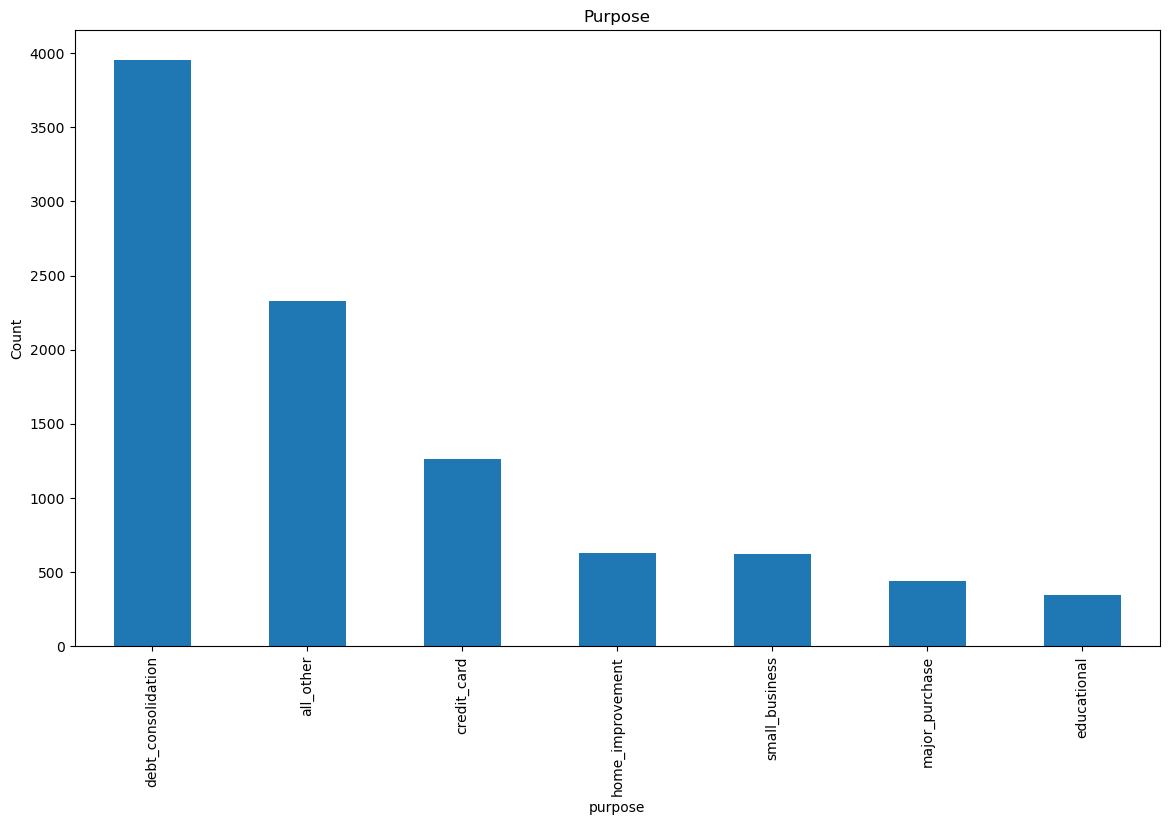

In [38]:
# inspect categorical data in Purpose
ax = loan_data['purpose'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Purpose")
ax.set_ylabel("Count")

In [49]:
# Now for Purpose we can convert categorical values into numeric values

#First we create a mapping dictionario for the categories in purpose
purpose_mapping = {
    'debt_consolidation': 0,
    'credit_card': 1,
    'home_improvement': 2,
    'educational': 3,
    'major_purchase': 4,
    'small_business': 5,
    'all_other': 6
}

#Map the categories after creating a duplicate of loan data called data
data = loan_data
data['purpose_number'] = data['purpose'].map(purpose_mapping)

#quick preview of all unique values
print(data[['purpose', 'purpose_number']].drop_duplicates())

               purpose  purpose_number
0   debt_consolidation               0
1          credit_card               1
7            all_other               6
8     home_improvement               2
13      small_business               5
15      major_purchase               4
46         educational               3


In [57]:
# Save data
data.shape

datapath = '../data/loan_data_cleaned.csv'
data.to_csv(datapath, index=F)

NameError: name 'save_file' is not defined